# Notebook zu Blatt 8

In [1]:
%pip install numpy seaborn

     ---------------------------------------- 14.8/14.8 MB 4.6 MB/s eta 0:00:00
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
     ---------------------------------------- 10.3/10.3 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 3.3 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.6 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached pytz-2022.7-py2.py3-none-any.whl (499 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np      # um zufÃ¤llige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten
import matplotlib.pyplot as plt #zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [ ]:
def selectionSort(array):
  n = len(array)
  # Iterate through the array
  for i in range(n):
    # Find the minimum element in the unsorted portion of the array
    min_index = i
    for j in range(i+1, n):
      if array[j] < array[min_index]:
        min_index = j
    # Swap the minimum element with the first element of the unsorted portion
    buffer = array[i]
    array[i] = array[min_index]
    array[min_index] = buffer
  return array

In [ ]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [ ]:
def quickSort(array):
  if len(array) <= 1:
    return array
  pivot = array[len(array) // 2]
  left = []
  middle = []
  right = []
  for i in range(len(array)):
    if array[i] < pivot:
      left.append(array[i])
    elif array [i] == pivot:
      middle.append(array[i])
    else:
      right.append(array[i])
  return quickSort(left) + middle + quickSort(right)

In [ ]:
array = [7,5,8,1] 
quickSort(array)
print(quickSort(array)) # das sortierte array

[1, 5, 7, 8]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [ ]:
assert selectionSort([]) == [], "Should be []"
assert selectionSort([1]) == [1], "Should be [1]"
assert selectionSort([1,0]) == [0,1], "Should be [0,1]"
assert selectionSort([1,2]) == [1,2], "Should be [1,2]"
assert selectionSort([2,1]) == [1,2], "Should be [1,2]"
assert selectionSort([1,2,3,4,5,6]) == [1,2,3,4,5,6], "Should be [1,2,3,4,5,6]"
assert selectionSort([6,5,4,3,2,1]) == [1,2,3,4,5,6], "Should be [1,2,3,4,5,6]"
assert selectionSort([-2,2,0]) == [-2,0,2], "Should be [-2,0,2]"
assert selectionSort([-20,-10,-30]) == [-30,-20,-10], "Should be [-30,-20,-10]"
assert selectionSort([-20,-10,-30,0,2022,4382,5]) == [-30,-20,-10,0,5,2022,4382], "Should be [-30,-20,-10,0,5,2022,4382]"
assert selectionSort([0,-2.5,3.7,3.2,3,8.1,-2.3]) == [-2.5,-2.3,0,3,3.2,3.7,8.1], "Should be [-2.5,-2.3,0,3,3.2,3.7,8.1]"


assert quickSort([]) == [], "Should be []"
assert quickSort([1]) == [1], "Should be [1]"
assert quickSort([1,0]) == [0,1], "Should be [0,1]"
assert quickSort([1,2]) == [1,2], "Should be [1,2]"
assert quickSort([2,1]) == [1,2], "Should be [1,2]"
assert quickSort([1,2,3,4,5,6]) == [1,2,3,4,5,6], "Should be [1,2,3,4,5,6]"
assert quickSort([6,5,4,3,2,1]) == [1,2,3,4,5,6], "Should be [1,2,3,4,5,6]"
assert quickSort([-2,2,0]) == [-2,0,2], "Should be [-2,0,2]"
assert quickSort([-20,-10,-30]) == [-30,-20,-10], "Should be [-30,-20,-10]"
assert quickSort([-20,-10,-30,0,2022,4382,5]) == [-30,-20,-10,0,5,2022,4382], "Should be [-30,-20,-10,0,5,2022,4382]"
assert quickSort([0,-2.5,3.7,3.2,3,8.1,-2.3]) == [-2.5,-2.3,0,3,3.2,3.7,8.1], "Should be [-2.5,-2.3,0,3,3.2,3.7,8.1]"


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [ ]:
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung fÃ¼r verschiedenen array-lÃ¤ngen
for size in arrar_sizes:
    # ziehe ein zufÃ¤lliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    end = time.time()
    s_times.append(end-start) # die zeit in sekunden

    # und dann jetzt noch fÃ¼r quicksort :)

NameError: name 'np' is not defined

#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in AbhÃ¤ngigkeit von der Eingabelänge darstellt

In [ ]:
# Hier kommet der Plot!

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

In [ ]:
# Hier kommen die Plots!

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit von Quicksort in Python

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

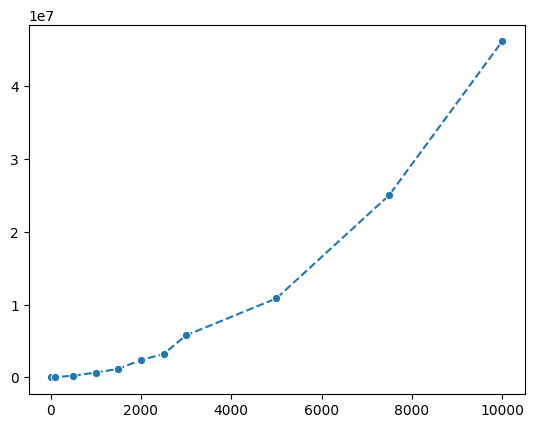

In [12]:
# 5 has to be compiled first

import os.path,subprocess
from subprocess import STDOUT,PIPE

arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen

# Quelle: https://stackoverflow.com/questions/49492655/call-java-program-with-arguments-from-python-and-return-results-back-to-python
def compile_java_sort():
    subprocess.check_call(['javac', 'CustomSort/Sorting.java'])

def execute_java_sort(sample_size, sort):
    java_class,ext = os.path.splitext('CustomSort/Sorting.java')
    cmd = ['java', java_class, str(sample_size), sort]
    proc = subprocess.Popen(cmd, stdout=PIPE, stderr=STDOUT)
    stdout,stderr = proc.communicate()
    return float(stdout)

# Create an array with the running times of selection sort in java
def java_selection_sort():
    result = []
    for size in arrar_sizes:
        result.append(execute_java_sort(size, "selection"))
    return result

# Create an array with the running times of quicksort in java
def java_quick_sort():
    result = []
    for size in arrar_sizes:
        result.append(execute_java_sort(size, "quick"))
    return result

# convert ns into s
def convert_to_sec(array):
    for time in array:
        time = time/1000000000
    return array

compile_java_sort()
java_s_times = convert_to_sec(java_selection_sort())
java_q_times = convert_to_sec(java_quick_sort())

#Plot for Quicksort
sns.lineplot(x = arrar_sizes, y = q_times, linestyle="dashed", marker="o", label="Quicksort in Python") 
sns.lineplot(x = arrar_sizes, y = java_q_times, linestyle="dashed", marker="o", label="Quicksort in Java")
plt.title("Vergleich der Laufzeiten von Quicksort in Java zu Python")    
plt.legend(loc="best")                                         
plt.xlabel("Eingabelänge")                                   
plt.ylabel("Laufzeit in s")
plt.show()

#Plot for Selection-Sort
sns.lineplot(x = arrar_sizes, y = s_times, linestyle="dashed", marker="o", label="Selection-Sort in Python") 
sns.lineplot(x = arrar_sizes, y = java_s_times, linestyle="dashed", marker="o", label="Selection-Sort in Java")
plt.title("Vergleich der Laufzeiten von Selection-Sort in Java zu Python")    
plt.legend(loc="best")                                         
plt.xlabel("Eingabelänge")                                   
plt.ylabel("Laufzeit in s")
plt.show()

#### 9. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [ ]:
# 8 has to be compiled first

def native_sort():
    result = []
    compile_java_sort()
    for size in arrar_sizes:
        # ziehe ein zufälliges array
        np.random.seed(0)
        array = np.random.randint(low=0, high=1000000, size=size) 
        start = time.time_ns()
        array.sort()
        end = time.time_ns()
        result.append(end-start)
    return result

compile_java_sort()
#Plot
sns.lineplot(x = arrar_sizes, y = native_sort(), linestyle="dashed", marker="o", label="native sort()") 
sns.lineplot(x = arrar_sizes, y = java_selection_sort(), linestyle="dashed", marker="o", label="Selection-Sort in java")
sns.lineplot(x = arrar_sizes, y = java_quick_sort(), linestyle="dashed", marker="o", label="Quicksort in java") 
plt.title("Vergleich von unseren effizienten Algorithmen zum nativen Sortieralgorithmus")    
plt.legend(loc="best")                                         
plt.xlabel("Eingabelänge")                                   
plt.ylabel("Laufzeit in ns")
plt.show()